In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(40, 30))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title(), color='black')
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
def image_distortion(img):
    h, w = img.shape[:2]

    center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, 20, 1)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    img_distorted = rotated[:h//2, :w//2]
    
    return img_distorted

In [3]:
image_h_c = cv2.imread('image_high_contrast.jpg', cv2.COLOR_BGR2RGB)
image_l_c = cv2.imread('image_low_contrast.jpg', cv2.COLOR_BGR2RGB)

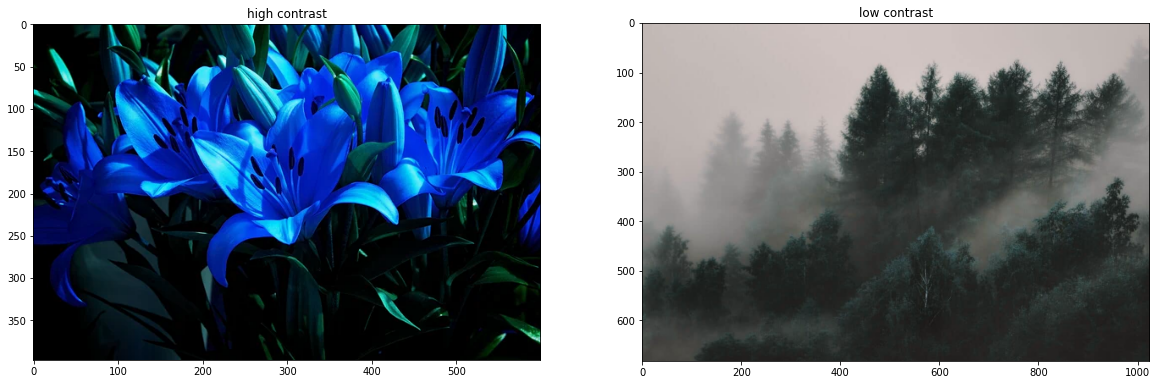

In [4]:
plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.title('high contrast')
plt.imshow(image_h_c)
plt.subplot(222)
plt.title('low contrast')
plt.imshow(image_l_c)
plt.show()

## Варіант 6: SURF


In [5]:
img_distorted1 = image_distortion(image_h_c)
img_distorted2 = image_distortion(image_l_c)

In [6]:
def compute_surf(image):
    surf = cv2.xfeatures2d.SURF_create()

    kp, des = surf.detectAndCompute(image, None)
    return kp, des

In [7]:
def feature_matching(img1, img2, kp1, kp2, des1, des2):
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x:x.distance)

    return cv2.drawMatches(img1, kp1, img2, kp2, matches[:5], img2, flags=2)


def custom_matching(img1, img2, kp1, kp2, des1, des2):
    matches = []
    
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            dist = np.linalg.norm(k1 - k2, ord=1)
            
            matches.append(cv2.DMatch(_distance=dist, _imgIdx=0, _queryIdx=i, _trainIdx=j))
    
    matches = sorted(matches, key = lambda x:x.distance)
    return cv2.drawMatches(img1, kp1, img2, kp2, matches[:5], img2, flags=2)

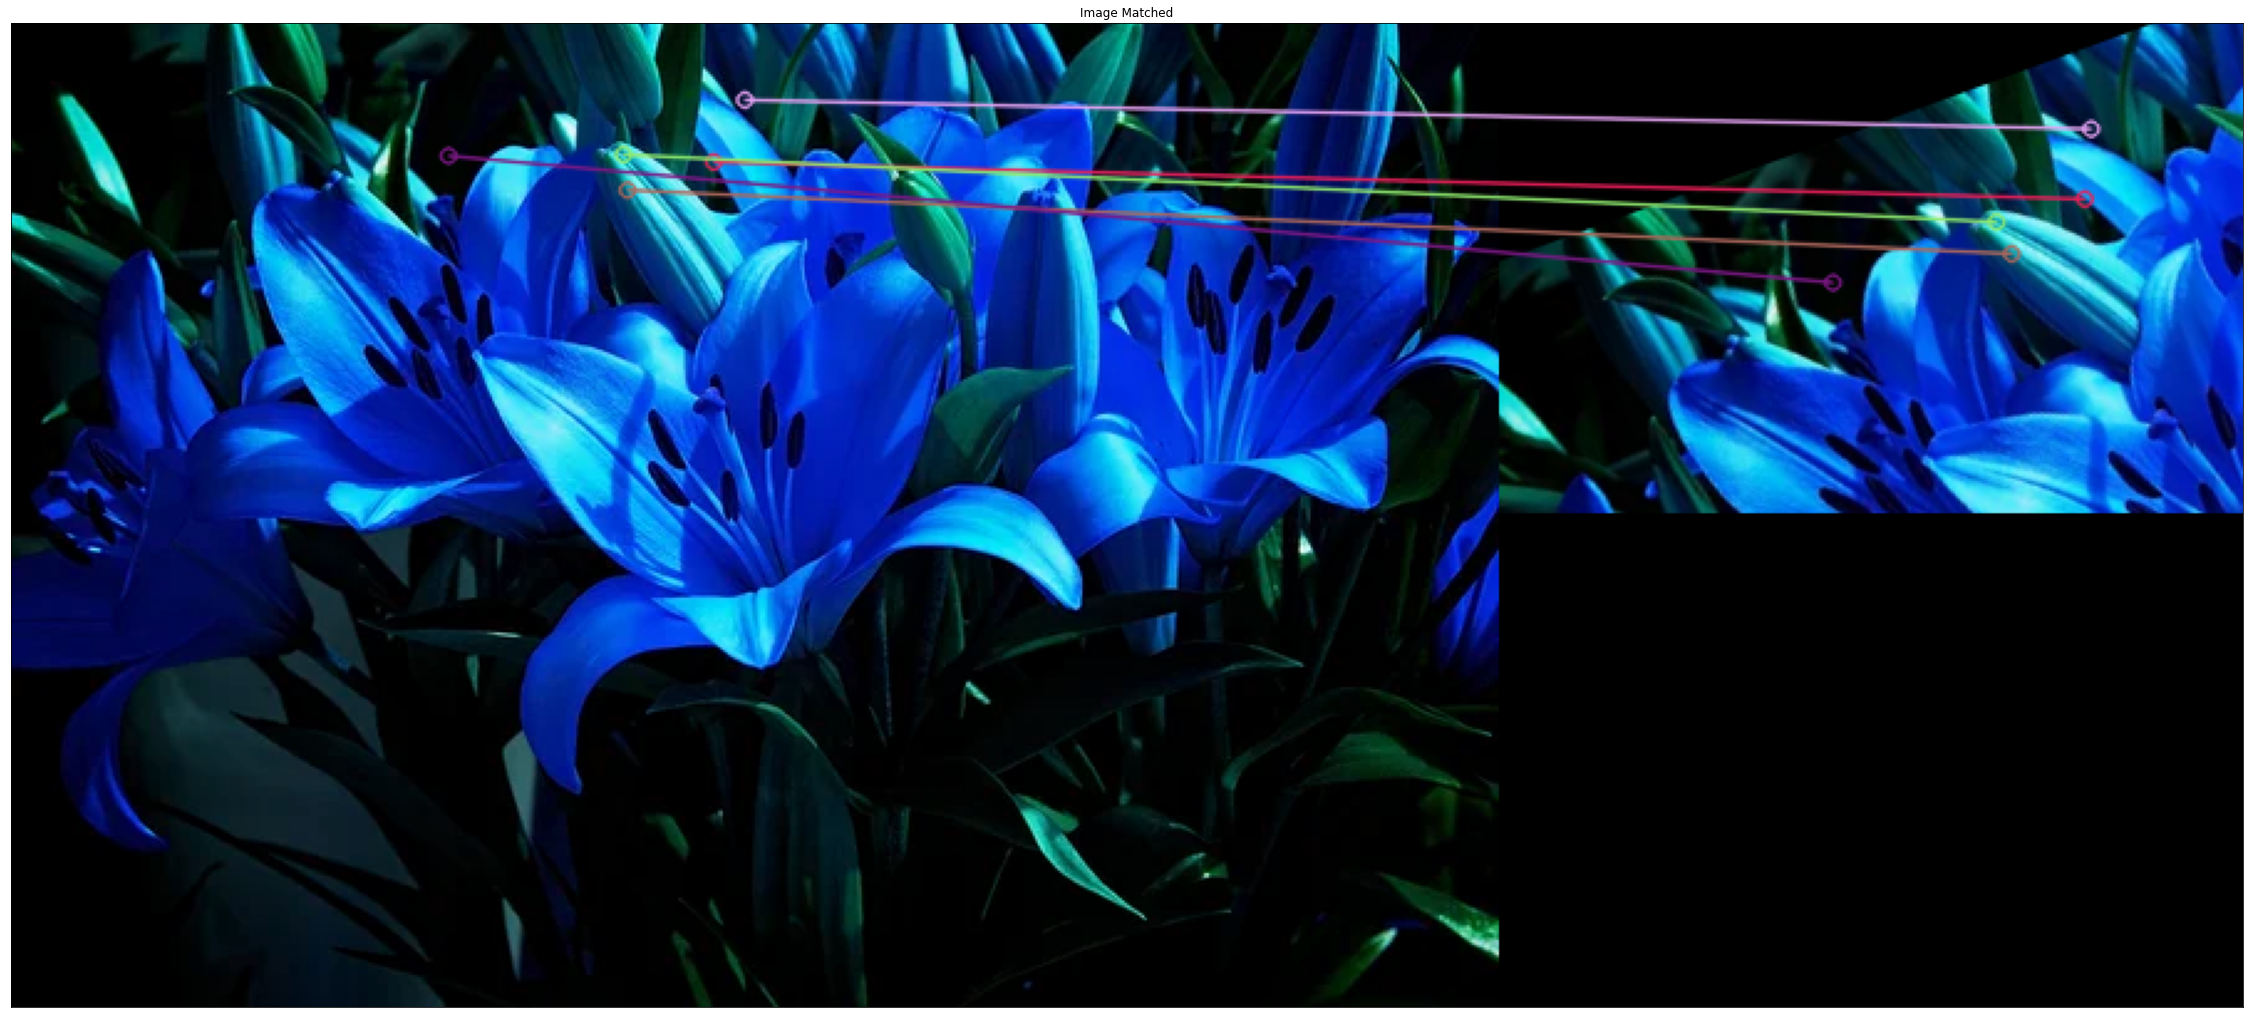

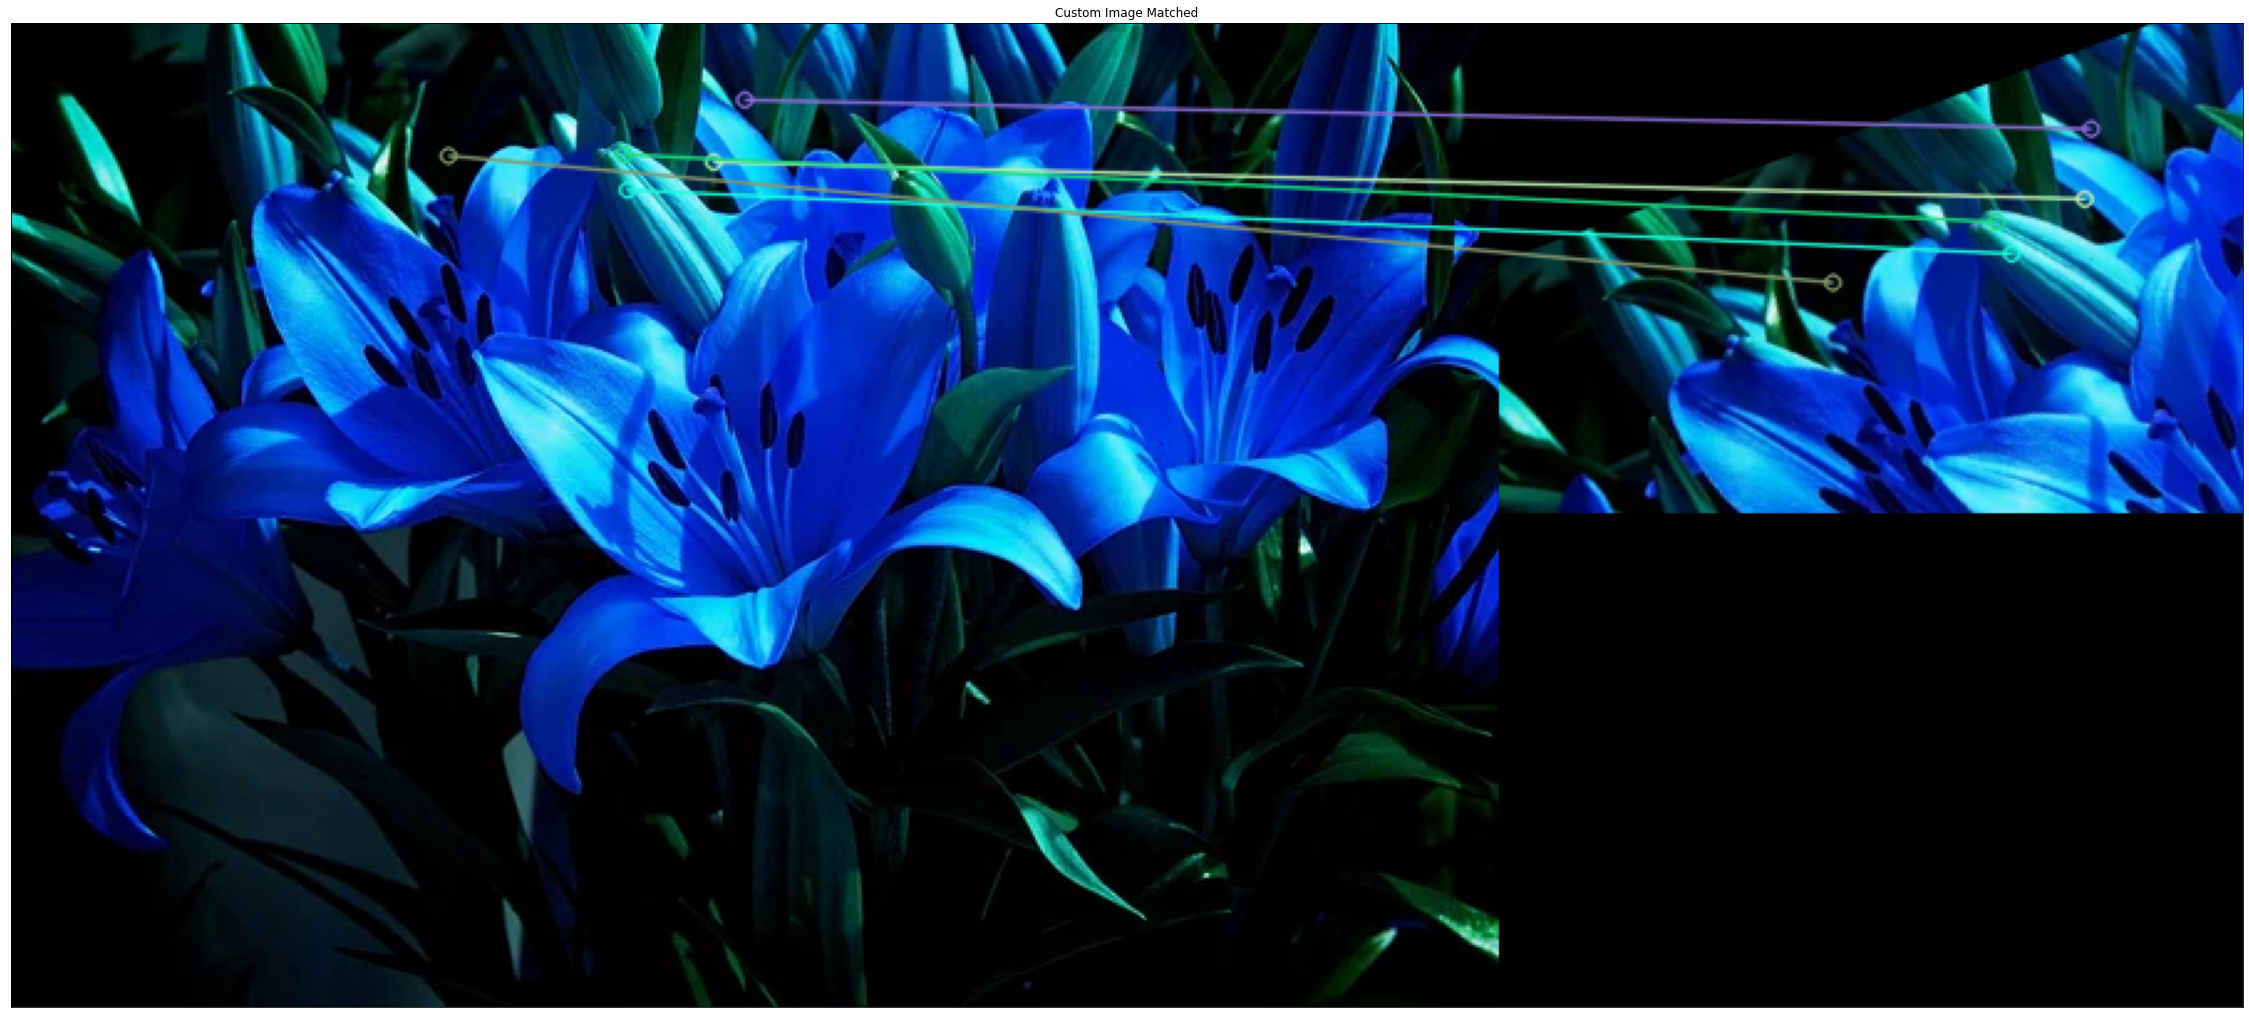

In [8]:
kp1, des1 = compute_surf(image_h_c)
kp2, des2 = compute_surf(img_distorted1)
# img_ = cv2.drawKeypoints(image_h_c, kp1, image_h_c,)

image_matched = feature_matching(image_h_c, img_distorted1, kp1, kp2, des1, des2)
visualize(image_matched=image_matched)

custom_image_matched = custom_matching(image_h_c, img_distorted1, kp1, kp2, des1, des2)
visualize(custom_image_matched=custom_image_matched)

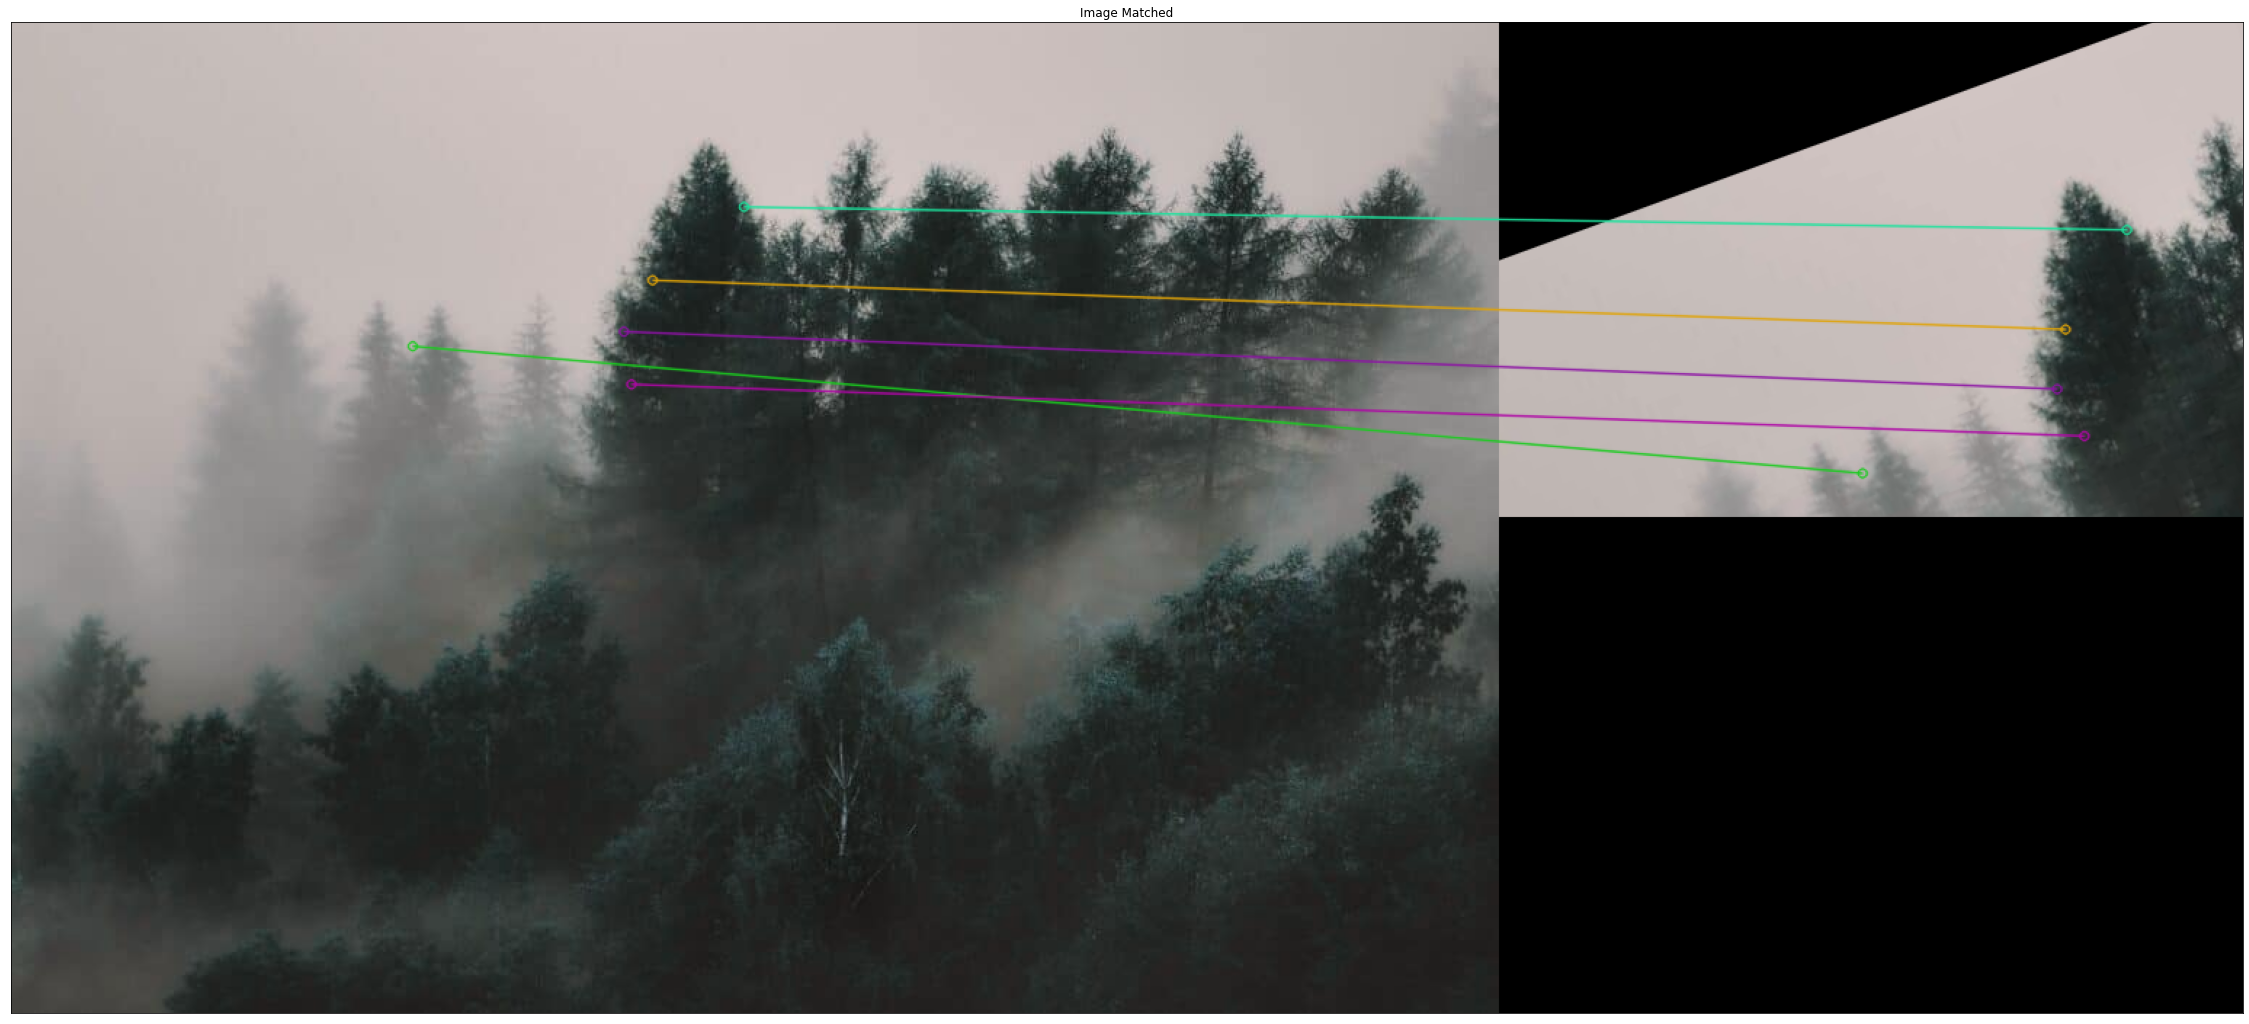

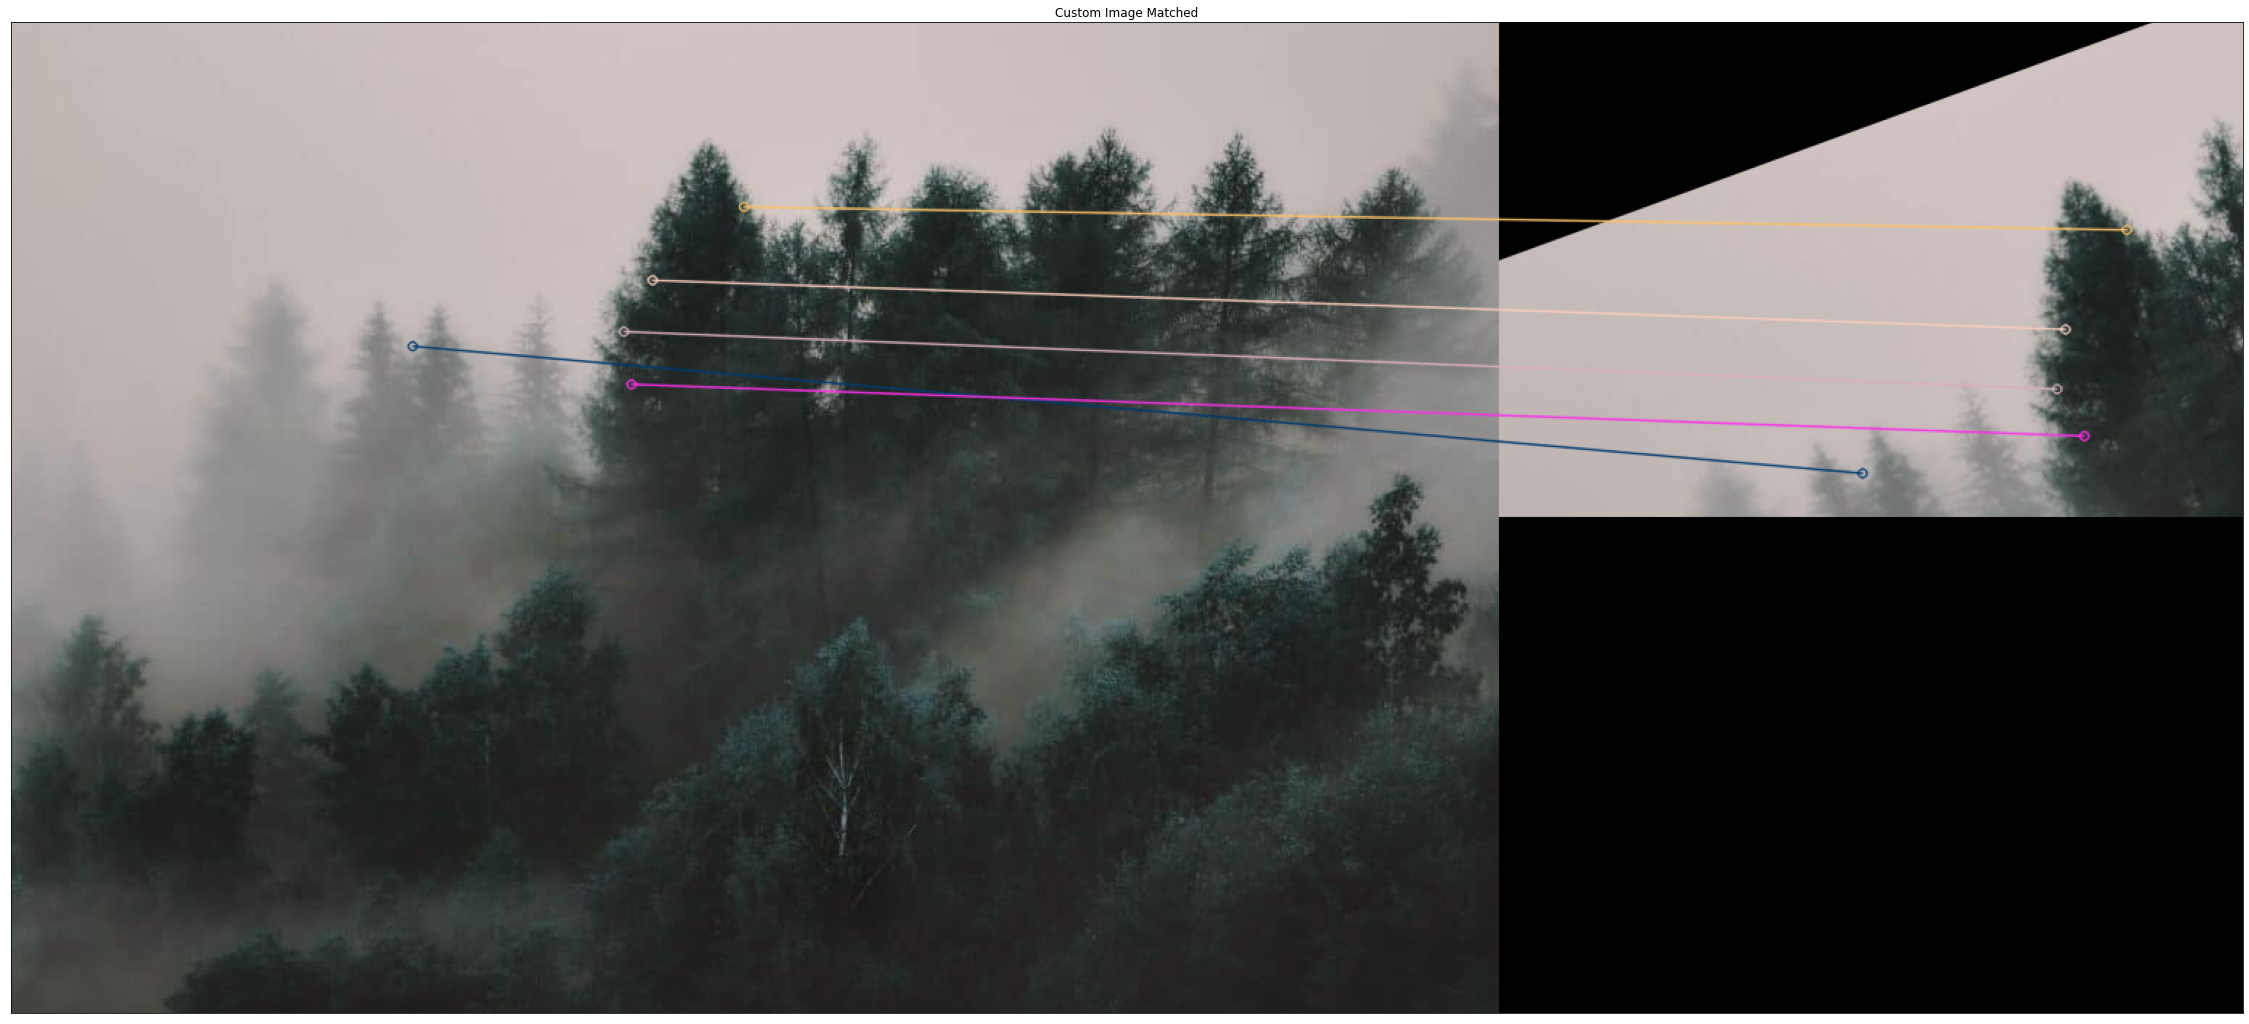

In [9]:
kp1, des1 = compute_surf(image_l_c)
kp2, des2 = compute_surf(img_distorted2)

image_matched = feature_matching(image_l_c, img_distorted2, kp1, kp2, des1, des2)
visualize(image_matched=image_matched)

custom_image_matched = custom_matching(image_l_c, img_distorted2, kp1, kp2, des1, des2)
visualize(custom_image_matched=custom_image_matched)